*Dataset construido por:*

*Gabriel de Carvalho Vasconcelos gcv@cesar.school*

*Eduardo Vaz de Oliveira Gerab evog@cesar.school*

# **Boston Housing Prices Dataset**

## **Mounting & Importing**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **Parte 1**
### **Tratamento e Visualização Inicial dos Dados**

Para trabalharmos com este Dataset, é necessário uma organização dos dados nas colunas, também vamos separar a base de dados do Dataset em treinamento '**df**' e teste '**dftest**'.

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dados/housingtrain.csv', header=0, sep=',')
dftest = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Dados/housingtest.csv', header=0, sep=',')

In [ ]:
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [ ]:
dftest.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
1,6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
2,8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
3,9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
4,10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [ ]:
valores_nan = df.isnull().sum()
print(valores_nan)

ID         0
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64


Para este Dataset, vamos realizar a remoção da coluna B, por questões de necessidade para realização da atividade.

In [ ]:
df.drop('black', axis=1, inplace=True)
dftest.drop('black', axis=1, inplace=True)

In [ ]:
for coluna in df.columns:
    stat, a = shapiro(df[coluna])
    alpha = 0.05

    if a > alpha:
        print(f'A coluna "{coluna}" provavelmente segue uma distribuição normal')
    else:
        print(f'A coluna "{coluna}" provavelmente não segue uma distribuição normal')

A coluna "ID" provavelmente não segue uma distribuição normal
A coluna "crim" provavelmente não segue uma distribuição normal
A coluna "zn" provavelmente não segue uma distribuição normal
A coluna "indus" provavelmente não segue uma distribuição normal
A coluna "chas" provavelmente não segue uma distribuição normal
A coluna "nox" provavelmente não segue uma distribuição normal
A coluna "rm" provavelmente não segue uma distribuição normal
A coluna "age" provavelmente não segue uma distribuição normal
A coluna "dis" provavelmente não segue uma distribuição normal
A coluna "rad" provavelmente não segue uma distribuição normal
A coluna "tax" provavelmente não segue uma distribuição normal
A coluna "ptratio" provavelmente não segue uma distribuição normal
A coluna "lstat" provavelmente não segue uma distribuição normal
A coluna "medv" provavelmente não segue uma distribuição normal


Nosso objetivo neste Dataset, é utilizar o nosso target (MEDV) para realizar comparações com este coluna, então, vamos utilizar da Matriz de Correlação para vermos qual a relação de cada variável com esta coluna.

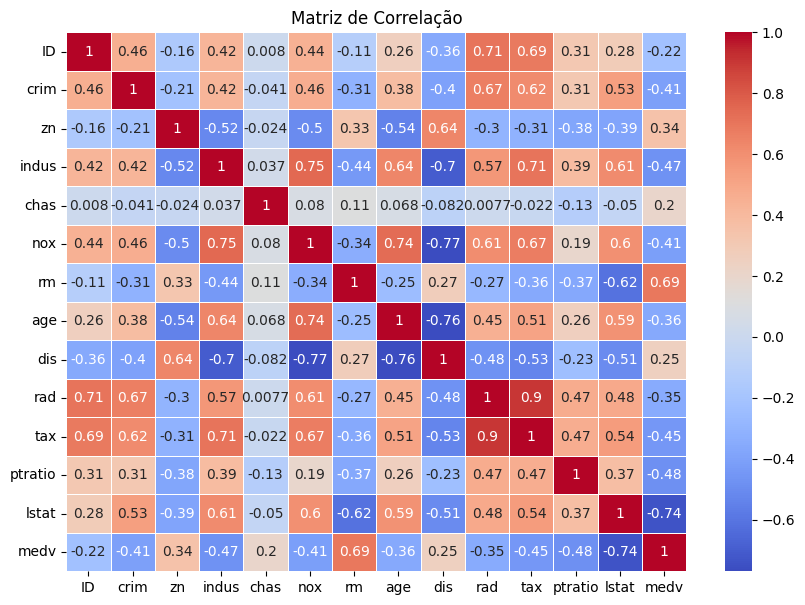

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Matriz de Correlação")
plt.show()

A partir do plot do gráfico de Matriz de Correlação, percebemos que as variáveis **RM** e **LSTAT** possuem respectivamente a maior relação positiva e negativa com nossa variável target **MEDV**.

Vamos plottar então um gráfico Scatterplot para demonstrar essa dispersão com relação a **MEDV**.

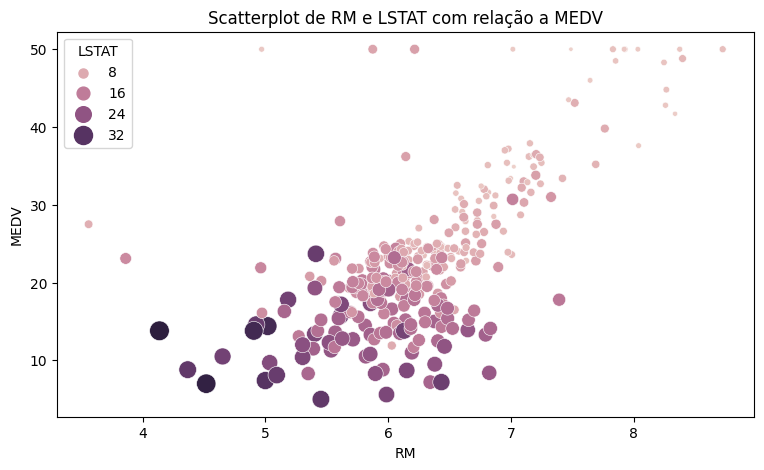

In [ ]:
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df, x='rm', y='medv', hue='lstat', size='lstat', sizes=(10, 200))
plt.title('Scatterplot de RM e LSTAT com relação a MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend(title='LSTAT')
plt.show()

### **Divisão & Padronização dos Dados p/ Treinamento**

#### Divisão com Somente 1 Variável

Dividimos a base somente com uma variável para realizarmos o treinamento, utilizamos a variável de maior correlação para isso.

In [ ]:
X = df['rm']
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [ ]:
scaler = RobustScaler()

X_train = scaler.fit(X_train).transform(X_train)
X_test = scaler.fit(X_test).transform(X_test)

### **Regressão Linear**
#### Treinamento do Modelo

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Visualização e R2 Score do Modelo

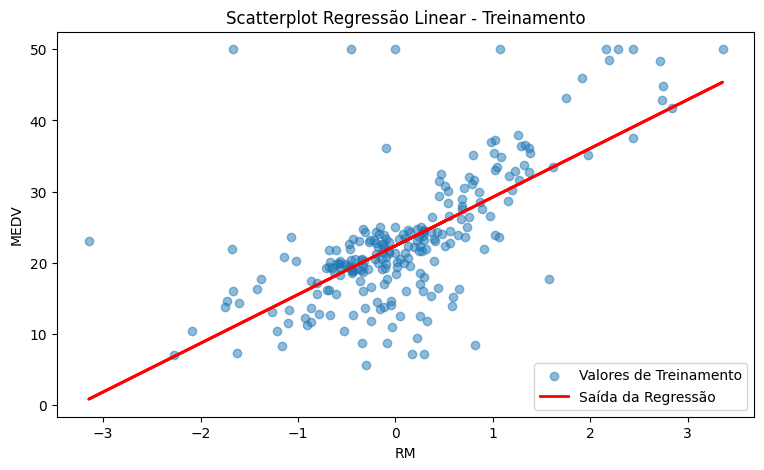

In [ ]:
y_pred_train = model.predict(X_train)

plt.figure(figsize=(9, 5))
plt.scatter(X_train, y_train, alpha=0.5, label='Valores de Treinamento')
plt.plot(X_train, y_pred_train, color='red', linewidth=2, label='Saída da Regressão')
plt.title('Scatterplot Regressão Linear - Treinamento')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()
plt.show()

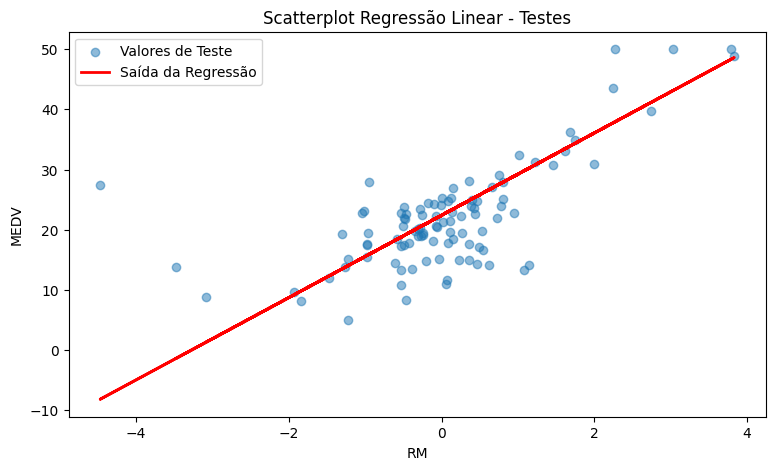

In [ ]:
y_pred_test = model.predict(X_test)

plt.figure(figsize=(9, 5))
plt.scatter(X_test, y_test, alpha=0.5, label='Valores de Teste')
plt.plot(X_test, y_pred_test, color='red', linewidth=2, label='Saída da Regressão')
plt.title('Scatterplot Regressão Linear - Testes')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()
plt.show()

In [ ]:
r2_train = r2_score(y_train, model.predict(X_train))
r2_train = round(r2_train, 2)
print(f"R² Score do Conjunto de Treinamento: {r2_train}")

r2_test = r2_score(y_test, model.predict(X_test))
r2_test = round(r2_test, 2)
print(f"R² Score do Conjunto de Teste: {r2_test}")

R² Score do Conjunto de Treinamento: 0.47
R² Score do Conjunto de Teste: 0.42


Nesse caso, temos que o R2 Score do Treinamento foi maior do que o da base de testes, visto que o modelo de Treinamento foi Treinado (duh!) e isso melhorou a performance da base dos mesmos.

### **Treinamento do Modelo com Diversos X**

Para realizar este treimamento, precisamos descobrir outras variáveis que possuem bastante relação com **MEDV**, então, vamos descobrir e escolher mais duas dessas variáveis.

In [ ]:
pos_correlation = corr_matrix['medv'].sort_values(ascending=False)
pos_correlation = pos_correlation[pos_correlation > 0]
neg_correlation = corr_matrix['medv'].sort_values(ascending=True)
neg_correlation = neg_correlation[neg_correlation < 0]

print("Variáveis c/ maiores correlações positivas:")
print(pos_correlation)
print("\nVariáveis c/ maiores correlações negativas:")
print(neg_correlation)

Variáveis c/ maiores correlações positivas:
medv    1.000000
rm      0.689598
zn      0.344842
dis     0.249422
chas    0.204390
Name: medv, dtype: float64

Variáveis c/ maiores correlações negativas:
lstat     -0.738600
ptratio   -0.481376
indus     -0.473932
tax       -0.448078
nox       -0.413054
crim      -0.407454
age       -0.358888
rad       -0.352251
ID        -0.221694
Name: medv, dtype: float64


Temos então que **LSTAT** e **RM** são as variáveis com maior correlação com **MEDV**, porém, para este caso vamos utilizar TODAS as variáveis do Dataset, para mantermos uma padronização no treinamento dos dados, visto que estamos utilizando todas elas para obter um melhor Score no futuro.

In [ ]:
y1 = df['medv']
X1 = df[['rm', 'lstat', 'ptratio', 'crim', 'zn', 'indus', 'chas',	'nox', 'rm', 'age',	'dis', 'rad',	'tax']]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

X1_train = scaler.fit(X1_train).transform(X1_train)
X1_test = scaler.fit(X1_test).transform(X1_test)

In [ ]:
model1 = LinearRegression()
model1.fit(X1_train, y1_train)

LinearRegression()

#### Visualização e R2 Score do Novo Modelo

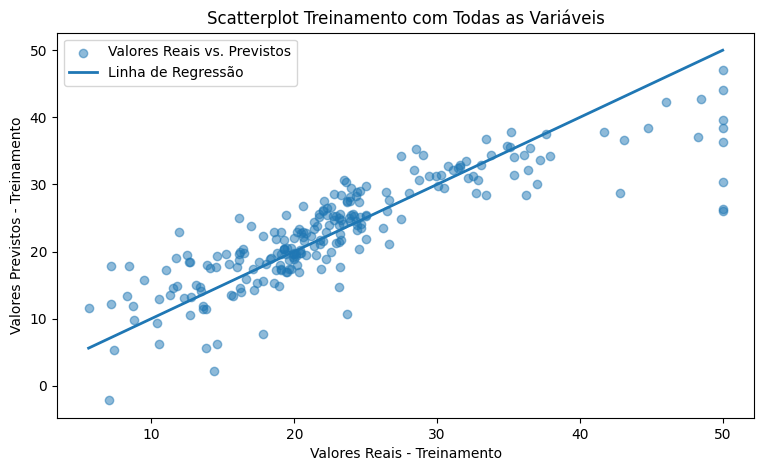

In [ ]:
y1_pred_train = model1.predict(X1_train)

plt.figure(figsize=(9, 5))
plt.scatter(y1_train, y1_pred_train, alpha=0.5, label='Valores Reais vs. Previstos')
plt.plot([y1_train.min(), y1_train.max()], [y1_train.min(), y1_train.max()], '-', lw=2, label='Linha de Regressão')
plt.title('Scatterplot Treinamento com Todas as Variáveis')
plt.xlabel('Valores Reais - Treinamento')
plt.ylabel('Valores Previstos - Treinamento')
plt.legend()
plt.show()

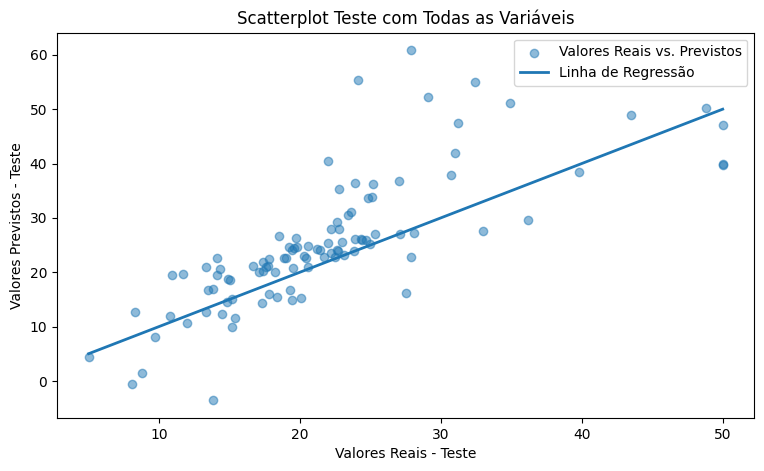

In [ ]:
y1_pred_test = model1.predict(X1_test)

plt.figure(figsize=(9, 5))
plt.scatter(y1_test, y1_pred_test, alpha=0.5, label='Valores Reais vs. Previstos')
plt.plot([y1_test.min(), y1_test.max()], [y1_test.min(), y1_test.max()], '-', lw=2, label='Linha de Regressão')
plt.title('Scatterplot Teste com Todas as Variáveis')
plt.xlabel('Valores Reais - Teste')
plt.ylabel('Valores Previstos - Teste')
plt.legend()
plt.show()

In [ ]:
r2_train = r2_score(y1_train, y1_pred_train)
r2_train = round(r2_train, 2)
print(f"R² Score do Conjunto de Treinamento: {r2_train}")

r2_test = r2_score(y1_test, y1_pred_test)
r2_test = round(r2_test, 2)
print(f"R² Score do Conjunto de Teste: {r2_test}")

R² Score do Conjunto de Treinamento: 0.72
R² Score do Conjunto de Teste: 0.1


#### Conclusão do Treinamento de Ambos os Modelos

Então, concluindo as construções de modelos e seus gráficos, podemos ver que com um maior número de variáveis sendo utilizada, o resultado de R2 Score aumenta, sendo positivo para nosso modelo, visto que queremos buscar sempre o resultado o mais próximo de 1 possível.

### **Regressão Polinomial**
#### Divisão da Base do Modelo Polinomial

In [ ]:
poly2 = PolynomialFeatures(degree=2)
X1_train_poly2 = poly2.fit_transform(X1_train)
X1_test_poly2 = poly2.transform(X1_test)

poly2_model = LinearRegression()
poly2_model.fit(X1_train_poly2, y1_train)
poly2_predictions = poly2_model.predict(X1_test_poly2)

poly3 = PolynomialFeatures(degree=3)
X1_train_poly3 = poly3.fit_transform(X1_train)
X1_test_poly3 = poly3.transform(X1_test)

poly3_model = LinearRegression()
poly3_model.fit(X1_train_poly3, y1_train)
poly3_predictions = poly3_model.predict(X1_test_poly3)

poly5 = PolynomialFeatures(degree=5)
X1_train_poly5 = poly5.fit_transform(X1_train)
X1_test_poly5 = poly5.transform(X1_test)

poly5_model = LinearRegression()
poly5_model.fit(X1_train_poly5, y1_train)
poly5_predictions = poly5_model.predict(X1_test_poly5)

In [ ]:
r2_score_poly2 = r2_score(y1_test, poly2_predictions)

r2_score_poly3 = r2_score(y1_test, poly3_predictions)

r2_score_poly5 = r2_score(y1_test, poly5_predictions)

print(f"R² score para modelo polinomial de grau 2: {r2_score_poly2:.2f}")
print(f"R² score para modelo polinomial de grau 3: {r2_score_poly3:.2f}")
print(f"R² score para modelo polinomial de grau 5: {r2_score_poly5:.2f}")

R² score para modelo polinomial de grau 2: -14.97
R² score para modelo polinomial de grau 3: -354555.91
R² score para modelo polinomial de grau 5: -68904376.56


### **Extra: Ridge e Lasso**

#### Treinamento e Visualização do Modelo

Primeiro, vamos utilizar os modelos de Ridge e Lasso com o valor de 1.0 no alpha, posteriormente podemos utilizar KFold para descobrir o melhor valor de alpha caso queiramos utilizar.

In [ ]:
alpha_ridge = 1.0
model_ridge = Ridge(alpha=alpha_ridge)
model_ridge.fit(X1_train, y1_train)

alpha_lasso = 1.0
model_lasso = Lasso(alpha=alpha_lasso)
model_lasso.fit(X1_train, y1_train)

Lasso()

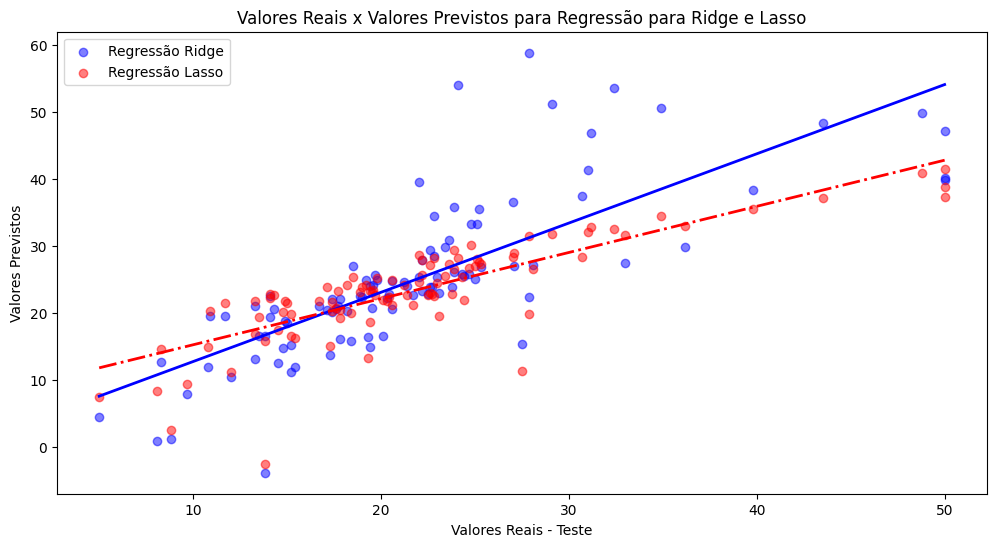

In [ ]:
y_real = y1_test
y_pred_ridge = model_ridge.predict(X1_test)
y_pred_lasso = model_lasso.predict(X1_test)

x_range = np.linspace(min(y_real), max(y_real), len(y_real))

plt.figure(figsize=(12, 6))

plt.scatter(y_real, y_pred_ridge, alpha=0.5, label='Regressão Ridge', color='blue')
plt.plot(np.unique(y_real), np.poly1d(np.polyfit(y_real, y_pred_ridge, 1))(np.unique(y_real)), color='blue', linestyle='-', lw=2)
plt.scatter(y_real, y_pred_lasso, alpha=0.5, label='Regressão Lasso', color='red')
plt.plot(np.unique(y_real), np.poly1d(np.polyfit(y_real, y_pred_lasso, 1))(np.unique(y_real)), color='red', linestyle='-.', lw=2)

plt.xlabel('Valores Reais - Teste')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais x Valores Previstos para Regressão para Ridge e Lasso')
plt.legend()
plt.show()

In [ ]:
r2score_ridge = r2_score(y1_test, y_pred_ridge)
r2score_lasso = r2_score(y1_test, y_pred_lasso)

print(f"R² Score Regressão Ridge: {r2score_ridge:.2f}")
print(f"R² Score Regressão Lasso: {r2score_lasso:.2f}")

R² Score Regressão Ridge: 0.17
R² Score Regressão Lasso: 0.65


#### Conclusão

Após utilizar e treinar os seguintes modelos, vemos que o modelo que ridge e lasso possuem valores de R2 Score semelhantes.

## **Parte 2**

A partir da análise desses modelos, vamos fazer comparações com outros métodos de avaliação além do R2 Score, são eles abaixo:
- Resíduos vs. Preditos
- Histograma da distribuição dos resíduos
- Mean Absolute Error
- Mean Square Error
- Root Mean Square Error
- Erro Médio Absoluto Percentual
- R² (R-Squared)

Vamos então, nesta sessão, comparar com gráficos e métricas, qual o melhor modelo para ser utilizado na submissão.

In [ ]:
X2 = df[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']]
y2 = df['medv']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

model1 = LinearRegression()
model1.fit(X2_train, y2_train)

model_ridge = LinearRegression()
model_ridge.fit(X2_train, y2_train)

model_lasso = LinearRegression()
model_lasso.fit(X2_train, y2_train)

LinearRegression()

### **Linear com 1 Variável**

In [ ]:
y_pred = model.predict(X_test)

#### Visualização + Cálculo das Métricas

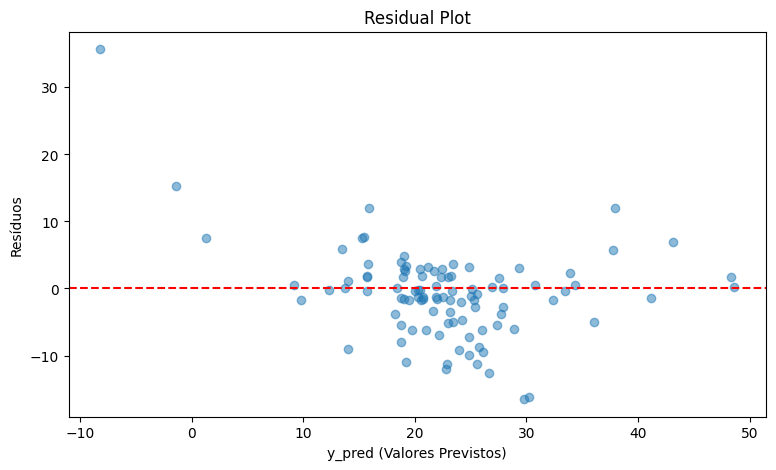

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(9, 5))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('y_pred (Valores Previstos)')
plt.ylabel('Resíduos')
plt.show()

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE (Erro Absoluto Médio): {mae:.2f}")
print('\n')
mse = mean_squared_error(y_test, y_pred)
print(f"MSE (Erro Quadrático Médio): {mse:.2f}")
print('\n')
rmse = np.sqrt(mse)
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")
print('\n')
mape = mean_absolute_percentage_error(y_test, y_pred) * 100
print(f"MAPE (Erro Percentual Absoluto Médio): {mape:.2f}%")
print('\n')
r2 = r2_score(y_test, y_pred)
print(f"R² (Coeficiente de Determinação): {r2:.2f}")

MAE (Erro Absoluto Médio): 4.44


MSE (Erro Quadrático Médio): 44.74


RMSE (Raiz do Erro Quadrático Médio): 6.69


MAPE (Erro Percentual Absoluto Médio): 26.66%


R² (Coeficiente de Determinação): 0.42


### **Linear com Todas as Variáveis**

In [ ]:
y_pred1 = model1.predict(X2_test)

#### Visualização + Cálculo das Métricas

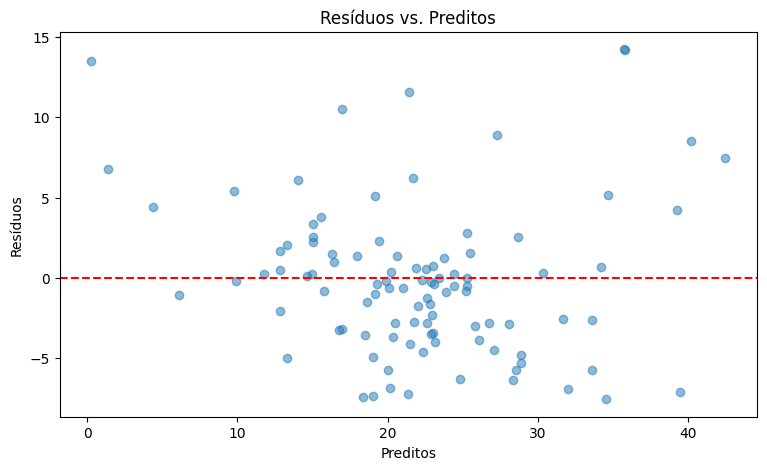

In [ ]:
residuals1 = y2_test - y_pred1

plt.figure(figsize=(9, 5))
plt.scatter(y_pred1, residuals1, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs. Preditos')
plt.xlabel('Preditos')
plt.ylabel('Resíduos')
plt.show()

In [ ]:
mae1 = mean_absolute_error(y2_test, y_pred1)
print(f"MAE (Erro Absoluto Médio): {mae1:.2f}")
print('\n')
mse1 = mean_squared_error(y2_test, y_pred1)
print(f"MSE (Erro Quadrático Médio): {mse1:.2f}")
print('\n')
rmse1 = np.sqrt(mse1)
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse1:.2f}")
print('\n')
mape1 = mean_absolute_percentage_error(y2_test, y_pred1) * 100
print(f"MAPE (Erro Médio Absoluto Percentual): {mape1:.2f}%")
print('\n')
r2_1 = r2_score(y2_test, y_pred1)
print(f"R² (Coeficiente de Determinação): {r2_1:.2f}")

MAE (Erro Absoluto Médio): 3.52


MSE (Erro Quadrático Médio): 22.51


RMSE (Raiz do Erro Quadrático Médio): 4.74


MAPE (Erro Médio Absoluto Percentual): 17.84%


R² (Coeficiente de Determinação): 0.71


### **Polinomial de Grau 2**

In [ ]:
n_splits_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

best_rmse = float('inf')
best_n_splits = None
best_poly2 = None


for n_splits in n_splits_values:
    kf = KFold(n_splits=n_splits)
    min_rmse = float('inf')
    model_with_min_rmse = None

    for train_index, test_index in kf.split(X2):
        X2_train, X2_test = X2.iloc[train_index], X2.iloc[test_index]
        y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]

        poly2 = PolynomialFeatures(degree=2)
        X2_train_poly2 = poly2.fit_transform(X2_train)
        X2_test_poly2 = poly2.transform(X2_test)

        poly2_model = LinearRegression()
        poly2_model.fit(X2_train_poly2, y2_train)
        poly2_predictions = poly2_model.predict(X2_test_poly2)

        rmse = np.sqrt(mean_squared_error(y2_test, poly2_predictions))

        if rmse < min_rmse:
            min_rmse = rmse
            model_with_min_rmse = poly2_model

    if min_rmse < best_rmse:
        best_rmse = min_rmse
        best_n_splits = n_splits
        best_poly2 = model_with_min_rmse

print(f"RMSE mínimo = {best_rmse:.2f}, n_splits = {best_n_splits}")

RMSE mínimo = 3.19, n_splits = 9


In [ ]:
mae_poly2 = mean_absolute_error(y2_test, poly2_predictions)
print(f"MAE (Erro Absoluto Médio - Modelo Polinomial de Grau 2): {mae_poly2:.2f}")

mse_poly2 = mean_squared_error(y2_test, poly2_predictions)
print(f"MSE (Erro Quadrático Médio - Modelo Polinomial de Grau 2): {mse_poly2:.2f}")

rmse_poly2 = np.sqrt(mse_poly2)
print(f"RMSE (Raiz do Erro Quadrático Médio - Modelo Polinomial de Grau 2): {rmse_poly2:.2f}")

r2_score_poly2 = r2_score(y2_test, poly2_predictions)
print(f"R² (Coeficiente de Determinação - Modelo Polinomial de Grau 2): {r2_score_poly2:.2f}")

MAE (Erro Absoluto Médio - Modelo Polinomial de Grau 2): 5.48
MSE (Erro Quadrático Médio - Modelo Polinomial de Grau 2): 46.23
RMSE (Raiz do Erro Quadrático Médio - Modelo Polinomial de Grau 2): 6.80
R² (Coeficiente de Determinação - Modelo Polinomial de Grau 2): -2.41


### **Polinomial de Grau 3**

In [ ]:
n_splits_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

best_rmse = float('inf')
best_n_splits = None
best_poly3 = None


for n_splits in n_splits_values:
    kf = KFold(n_splits=n_splits)
    min_rmse = float('inf')
    model_with_min_rmse = None

    for train_index, test_index in kf.split(X2):
        X2_train, X2_test = X2.iloc[train_index], X2.iloc[test_index]
        y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]

        poly3 = PolynomialFeatures(degree=3)
        X2_train_poly3 = poly3.fit_transform(X2_train)
        X2_test_poly3 = poly3.transform(X2_test)

        poly3_model = LinearRegression()
        poly3_model.fit(X2_train_poly3, y2_train)
        poly3_predictions = poly3_model.predict(X2_test_poly3)

        rmse = np.sqrt(mean_squared_error(y2_test, poly3_predictions))

        if rmse < min_rmse:
            min_rmse = rmse
            model_with_min_rmse = poly3_model

    if min_rmse < best_rmse:
        best_rmse = min_rmse
        best_n_splits = n_splits
        best_poly3 = model_with_min_rmse

print(f"RMSE mínimo = {best_rmse:.2f}, n_splits = {best_n_splits}")

RMSE mínimo = 61.62, n_splits = 10


In [ ]:
mae_poly3 = mean_absolute_error(y2_test, poly3_predictions)
print(f"MAE (Erro Absoluto Médio - Modelo Polinomial de Grau 3): {mae_poly3:.2f}")

mse_poly3 = mean_squared_error(y2_test, poly3_predictions)
print(f"MSE (Erro Quadrático Médio - Modelo Polinomial de Grau 3): {mse_poly3:.2f}")

rmse_poly3 = np.sqrt(mse_poly3)
print(f"RMSE (Raiz do Erro Quadrático Médio - Modelo Polinomial de Grau 3): {rmse_poly3:.2f}")

r2_score_poly3 = r2_score(y2_test, poly3_predictions)
print(f"R² (Coeficiente de Determinação - Modelo Polinomial de Grau 3): {r2_score_poly3:.2f}")

MAE (Erro Absoluto Médio - Modelo Polinomial de Grau 3): 11307.56
MSE (Erro Quadrático Médio - Modelo Polinomial de Grau 3): 934163586.21
RMSE (Raiz do Erro Quadrático Médio - Modelo Polinomial de Grau 3): 30564.09
R² (Coeficiente de Determinação - Modelo Polinomial de Grau 3): -68853351.05


### **Polinomial de Grau 5**

Contextualizar sobre menos valores de X

In [ ]:
n_splits_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

best_rmse = float('inf')
best_n_splits = None
best_poly5 = None


for n_splits in n_splits_values:
    kf = KFold(n_splits=n_splits)
    min_rmse = float('inf')
    model_with_min_rmse = None

    for train_index, test_index in kf.split(X2):
        X2_train, X2_test = X2.iloc[train_index], X2.iloc[test_index]
        y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]

        poly5 = PolynomialFeatures(degree=5)
        X2_train_poly5 = poly5.fit_transform(X2_train)
        X2_test_poly5 = poly5.transform(X2_test)

        poly5_model = LinearRegression()
        poly5_model.fit(X2_train_poly5, y2_train)
        poly5_predictions = poly5_model.predict(X2_test_poly5)

        rmse = np.sqrt(mean_squared_error(y2_test, poly5_predictions))

        if rmse < min_rmse:
            min_rmse = rmse
            model_with_min_rmse = poly5_model

    if min_rmse < best_rmse:
        best_rmse = min_rmse
        best_n_splits = n_splits
        best_poly5 = model_with_min_rmse

print(f"RMSE mínimo = {best_rmse:.2f}, n_splits = {best_n_splits}")

RMSE mínimo = 34.65, n_splits = 10


In [ ]:
mae_poly5 = mean_absolute_error(y2_test, poly5_predictions)
print(f"MAE (Erro Absoluto Médio - Modelo Polinomial de Grau 3): {mae_poly5:.2f}")

mse_poly5 = mean_squared_error(y2_test, poly5_predictions)
print(f"MSE (Erro Quadrático Médio - Modelo Polinomial de Grau 3): {mse_poly5:.2f}")

rmse_poly5 = np.sqrt(mse_poly5)
print(f"RMSE (Raiz do Erro Quadrático Médio - Modelo Polinomial de Grau 3): {rmse_poly5:.2f}")

r2_score_poly5 = r2_score(y2_test, poly5_predictions)
print(f"R² (Coeficiente de Determinação - Modelo Polinomial de Grau 3): {r2_score_poly5:.2f}")

MAE (Erro Absoluto Médio - Modelo Polinomial de Grau 3): 514.59
MSE (Erro Quadrático Médio - Modelo Polinomial de Grau 3): 1620363.17
RMSE (Raiz do Erro Quadrático Médio - Modelo Polinomial de Grau 3): 1272.93
R² (Coeficiente de Determinação - Modelo Polinomial de Grau 3): -119429.30


### **Ridge e Lasso + Metricas de Avaliação**

In [ ]:
y_pred_ridge = model_ridge.predict(X2_test)

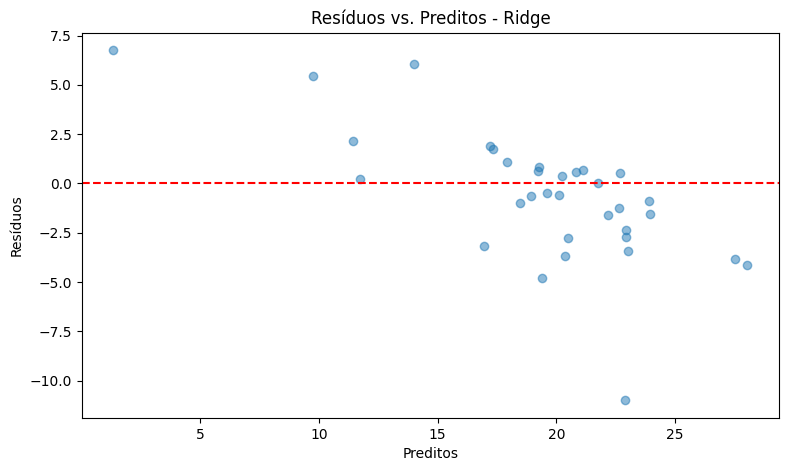

In [ ]:
residuals_ridge = y2_test - y_pred_ridge

plt.figure(figsize=(9, 5))
plt.scatter(y_pred_ridge, residuals_ridge, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs. Preditos - Ridge')
plt.xlabel('Preditos')
plt.ylabel('Resíduos')
plt.show()

In [ ]:
mae_ridge = mean_absolute_error(y2_test, y_pred_ridge)
print(f"MAE - Modelo Ridge: {mae_ridge:.2f}")
print('\n')
mse_ridge = mean_squared_error(y2_test, y_pred_ridge)
print(f"MSE - Modelo Ridge: {mse_ridge:.2f}")
print('\n')
rmse_ridge = np.sqrt(mse_ridge)
print(f"RMSE - Modelo Ridge: {rmse_ridge:.2f}")
print('\n')
mape_ridge = mean_absolute_percentage_error(y2_test, y_pred_ridge) * 100
print(f"MAPE - Modelo Ridge: {mape_ridge:.2f}%")
print('\n')
r2_ridge = r2_score(y2_test, y_pred_ridge)
print(f"R² - Modelo Ridge: {r2_ridge:.2f}")

MAE - Modelo Ridge: 2.39


MSE - Modelo Ridge: 11.15


RMSE - Modelo Ridge: 3.34


MAPE - Modelo Ridge: 15.47%


R² - Modelo Ridge: 0.18


In [ ]:
y_pred_lasso = model_lasso.predict(X2_test)

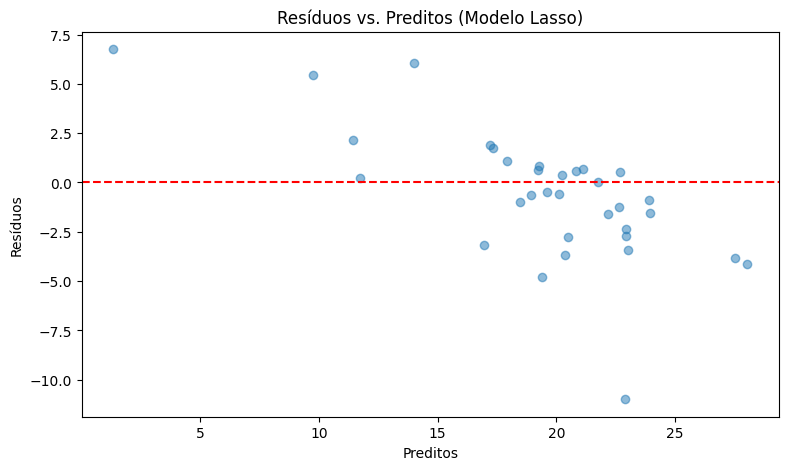

In [ ]:
residuals_lasso = y2_test - y_pred_lasso

plt.figure(figsize=(9, 5))
plt.scatter(y_pred_lasso, residuals_lasso, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs. Preditos (Modelo Lasso)')
plt.xlabel('Preditos')
plt.ylabel('Resíduos')
plt.show()

In [ ]:
mae_lasso = mean_absolute_error(y2_test, y_pred_lasso)
print(f"MAE (Erro Absoluto Médio - Modelo Lasso): {mae_lasso:.2f}")

mse_lasso = mean_squared_error(y2_test, y_pred_lasso)
print(f"MSE (Erro Quadrático Médio - Modelo Lasso): {mse_lasso:.2f}")

rmse_lasso = np.sqrt(mse_lasso)
print(f"RMSE (Raiz do Erro Quadrático Médio - Modelo Lasso): {rmse_lasso:.2f}")

mape_lasso = mean_absolute_percentage_error(y2_test, y_pred_lasso) * 100
print(f"MAPE (Erro Médio Absoluto Percentual - Modelo Lasso): {mape_lasso:.2f}%")

r2_lasso = r2_score(y2_test, y_pred_lasso)
print(f"R² (Coeficiente de Determinação - Modelo Lasso): {r2_lasso:.2f}")

MAE (Erro Absoluto Médio - Modelo Lasso): 2.39
MSE (Erro Quadrático Médio - Modelo Lasso): 11.15
RMSE (Raiz do Erro Quadrático Médio - Modelo Lasso): 3.34
MAPE (Erro Médio Absoluto Percentual - Modelo Lasso): 15.47%
R² (Coeficiente de Determinação - Modelo Lasso): 0.18


## **Conclusão Final + Submissão**

**Após a análise de diversas métricas e os gráficos dos modelos, chegamos a conclusão, e também por testes que foram feitos posteriormente, que o melhor modelo a ser utilizado seria o de Regressão Polinomial de Grau 2 em Linear Regression. obtendo um valor bastante positivo se comparado com os outros, então, vamos otimizar o máximo possível o modelo para submissão.**

#### Melhorando o Modelo para Submissão

In [ ]:
n_splits_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

best_rmse = float('inf')
best_n_splits = None
best_model = None


for n_splits in n_splits_values:
    kf = KFold(n_splits=n_splits)
    min_rmse = float('inf')
    model_with_min_rmse = None

    for train_index, test_index in kf.split(X2):
        X2_train, X2_test = X2.iloc[train_index], X2.iloc[test_index]
        y2_train, y2_test = y2.iloc[train_index], y2.iloc[test_index]

        poly2 = PolynomialFeatures(degree=2)
        X2_train_poly2 = poly2.fit_transform(X2_train)
        X2_test_poly2 = poly2.transform(X2_test)

        poly2_model = LinearRegression()
        poly2_model.fit(X2_train_poly2, y2_train)
        poly2_predictions = poly2_model.predict(X2_test_poly2)

        rmse = np.sqrt(mean_squared_error(y2_test, poly2_predictions))

        if rmse < min_rmse:
            min_rmse = rmse
            model_with_min_rmse = poly2_model

    if min_rmse < best_rmse:
        best_rmse = min_rmse
        best_n_splits = n_splits
        best_model = model_with_min_rmse

print(f"RMSE mínimo = {best_rmse:.2f}, n_splits = {best_n_splits}")

RMSE mínimo = 1.35, n_splits = 24


Temos então, o modelo Polinomial de Grau 2 com Linear Regression e utilizando todas as variáveis do Dataset, um resultado de RMSE de 1.35, e utilizamos KFold para descobrir qual o melhor valor de K para split da base de dados, que nesse caso foi 24.

In [ ]:
X2_test = dftest[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat']]

X2_test_poly = poly2.transform(X2_test)

predictions = best_model.predict(X2_test_poly)
dftest.head()

submission_df = pd.DataFrame({'ID': dftest['ID'], 'medv': predictions})
submission_df.to_csv('submission.csv', index=False)
submission_df.head()

,ID,medv
0,3,32.205147
1,6,26.327781
2,8,13.623959
3,9,10.872448
4,10,16.053904


Então, no resultado do Kaggle, temos um Score de 3.345, um resultado que ultrapassa os 20% benchmark descrito na atividade.